In [1]:
import json
import math
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
f = open('FFNNMODEL.json')
data = json.load(f)

In [3]:
inputLayer = data["input"]
hiddenLayer = data["hidden"]
outputLayer = data["output"]

In [4]:
def net(datas,neurons):
    net = []
    for neuron in neurons:
        result=0
        for i in range (len(datas)):
            result += datas[i] * neuron[i+1]
        result += neuron[0]
        net.append(result)
    return net

def sigmoid(net):
    h = []
    for i in net:
        result = 1/(1+math.exp(-i))
        h.append(result)
    return h

def activationFunction(functionType,net):
    if functionType == "sigmoid":
        result = []
        sigmoid_result = sigmoid(net)
        for res in sigmoid_result:
            if res > 0.5:
                result.append(1) # Kelas Positif
            else:
                result.append(0) # Kelas Negatif

        return result

    

[[[-10, 20, 20], [30, -20, -20]], [[-30, 20, 20], [10, -20, -20]], [[-30, 20, 20], [30, -20, -20]]]


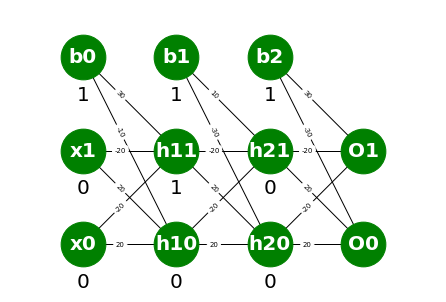

In [61]:
def ffnn(inputLayer,hiddenLayer,outputLayer):
    il_pos_y = 0
    
    hiddenNeuron = hiddenLayer["neuron"]
    outputNeuron = outputLayer["neuron"]
    listOfNeuron = []
    
    for neuron in hiddenNeuron:
        listOfNeuron.append(neuron)
    listOfNeuron.append(outputNeuron)
    
    print(listOfNeuron)
    
    datas = inputLayer["data"]
    layer = len(hiddenNeuron) + 1
    
    for i in range(len(datas[0])):
        G.add_node("x"+str(i),pos=(0,il_pos_y),data= datas[0][i])
        il_pos_y += 1
    G.add_node("b0",pos=(0,il_pos_y),data= 1)
    
    result = []
    
    for data in (datas):
        x = ffnnLogic(data,listOfNeuron,layer,0)
        result.append(x)

    return result

def ffnnLogic(data,neuron,layer,n):
    if n==layer:
        return data
    else:
        globalNet = net(data,neuron[n])
        newData = activationFunction("sigmoid",globalNet)
        #draw layer
        if(n<layer-1):
            for i in range(len(newData)):
                G.add_node("h"+str(n+1)+str(i),pos=(n+1,i),data = newData[i])
                if(n==0):
                    for j in range(len(data)):
                        G.add_edge("x"+str(j),"h"+str(n+1)+str(i),weight = neuron[n][i][j+1])
                    G.add_edge("b0","h"+str(n+1)+str(i),weight = neuron[n][i][0])
                else:
                    for j in range(len(data)):
                        G.add_edge("h"+str(n)+str(j),"h"+str(n+1)+str(i),weight = neuron[n][i][j+1])
                    G.add_edge("b"+str(n),"h"+str(n+1)+str(i),weight = neuron[n][i][0])


            G.add_node("b"+str(n+1),pos=(n+1,len(newData)),data = 1)
        else:
            for i in range(len(newData)):
                G.add_node("O"+str(i),pos=(n+1,i),data = newData[i])
                for j in range(len(data)):
                    G.add_edge("h"+str(n)+str(j),"O"+str(i), weight = neuron[n][i][j+1])
                G.add_edge("b"+str(n),"O"+str(i), weight = neuron[n][i][0])

        return ffnnLogic(newData, neuron, layer, n+1)


G= nx.Graph()
    
ffnn(inputLayer,hiddenLayer,outputLayer)
nx.draw(G,pos = nx.get_node_attributes(G,'pos'),with_labels= True ,
         font_weight='bold', node_color='green', node_size=2000, font_size=20
        ,font_family='sans-serif', font_color='white')

nx.draw_networkx_edge_labels(G ,pos=nx.get_node_attributes(G, 'pos'),
                              font_size=7, font_color='black', font_family='sans-serif',
                              edge_labels = nx.get_edge_attributes(G,'weight'),
                              label_pos = 0.6)


pos = nx.get_node_attributes(G, 'pos')
pos_modified = { k:[v[0],v[1]-0.4] for k,v in pos.items()}

nx.draw_networkx_labels(G, pos=pos_modified, 
                        labels=nx.get_node_attributes(G, 'data'), 
                        font_size=20, font_color='black', font_family='sans-serif')


plt.margins(0.2)


        

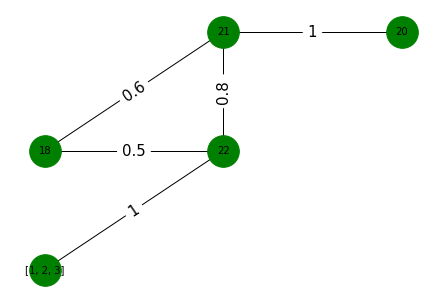

In [8]:
G = nx.Graph()

G.add_nodes_from( [
    ("A",{"Age":[1,2,3],"Gender":"F"}),
    ("B",{"Age":18,"Gender":"M"}),
    ("C",{"Age":22,"Gender":"M"}),
    ("D",{"Age":21,"Gender":"M"}),
    ("E",{"Age":20,"Gender":"F"})
])
G.add_edges_from([
    ("A","C",{"weight":1}),
    ("B","C",{"weight":0.5}),
    ("B","D",{"weight":0.6}),
    ("C","D",{"weight":0.8}),
    ("D","E",{"weight":1})
])

pos = {
    "A":(0,0),
    "B":(0,1),
    "C":(0.5,1),
    "D":(0.5,2),
    "E":(1,2)
}


nx.draw(G,pos=pos, font_weight='bold', node_color='green', node_size=1000, font_size=20
        ,font_family='sans-serif', font_color='white')


nx.draw_networkx_labels(G,pos=pos,labels=nx.get_node_attributes(G,'Age'),font_size=10)
nx.draw_networkx_edge_labels(G,pos=pos,edge_labels=nx.get_edge_attributes(G,'weight'),font_size=15)

plt.show()





